In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [29]:
consolidated= pd.read_csv('Database.csv')
test= pd.read_csv('test.csv')

consolidated['teamFTR'] = consolidated['teamFTA'] / consolidated['teamFGA']
consolidated['opptFTR'] = consolidated['opptFTA'] / consolidated['opptFGA']

test['teamFTR'] = test['teamFTA'] / test['teamFGA']
test['opptFTR'] = test['opptFTA'] / test['opptFGA']
consolidated= consolidated.drop(['teamFTA', 'teamFGA', 'opptFTA', 'opptFGA'], axis=1)
test= test.drop(['teamFTA', 'teamFGA', 'opptFTA', 'opptFGA'], axis=1)

consolidated = pd.get_dummies(data = consolidated, columns = ['teamRslt'])
consolidated= consolidated.drop(['teamRslt_Loss'], axis=1)
consolidated_scaled= consolidated.drop(columns=['teamAbbr'])

scaler = MinMaxScaler()
 
consolidated_scaled = scaler.fit_transform(consolidated_scaled.to_numpy())
consolidated_scaled = pd.DataFrame(consolidated_scaled, columns=['teamEFG%', 'teamTO%', 'teamOREB%', 'opptEFG%', \
            'opptTO%', 'opptOREB%', 'teamFTR', 'opptFTR', 'teamRslt_Win'])

test = scaler.fit_transform(test.to_numpy())
test = pd.DataFrame(test, columns=['teamEFG%', 'teamTO%', 'teamOREB%', 'opptEFG%', \
            'opptTO%', 'opptOREB%', 'teamFTR', 'opptFTR'])

X = consolidated_scaled.drop(columns=['teamRslt_Win'])
y = consolidated_scaled['teamRslt_Win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [30]:
clf = LogisticRegression(C =0.1, solver= 'liblinear',random_state=42)
clf.fit(X_train,y_train)
print("Logistic Regression train: " + str(clf.score(X_train, y_train)))

LogisticRegression= clf.predict(X_test)
print("Logistic Regression test: " + str(clf.score(X_test, y_test)))

rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(X_train,y_train)
print("Random Forest train: " + str(rf.score(X_train, y_train)))

RandomForest= rf.predict(X_test)
print("Random Forest test: " + str(rf.score(X_test, y_test)))

xgb = XGBClassifier(random_state = 42)
xgb.fit(X_train, y_train)
print("XG Boost train: " + str(xgb.score(X_train, y_train)))

XGBoost = xgb.predict(X_test)
print("XG Boost test: " + str(xgb.score(X_test, y_test)))

Logistic Regression train: 0.9058597502401537
Logistic Regression test: 0.9310344827586207
Random Forest train: 1.0
Random Forest test: 0.9181034482758621
XG Boost train: 1.0
XG Boost test: 0.9439655172413793


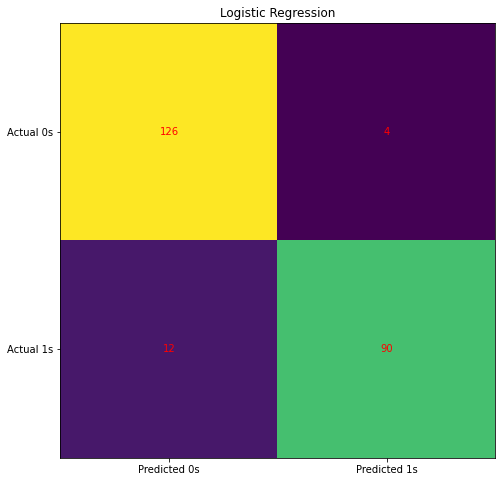

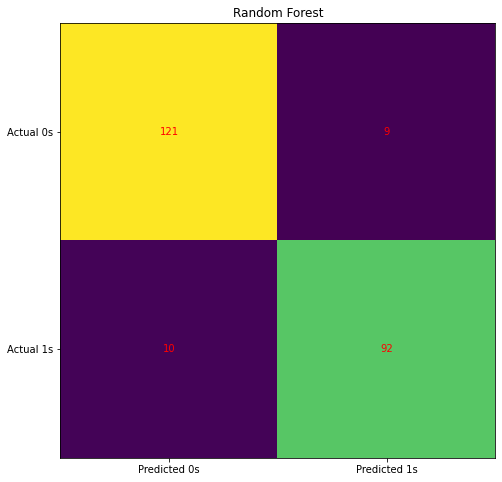

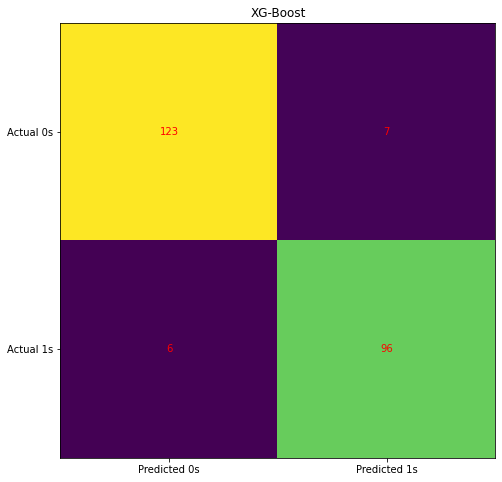

In [31]:
model= [LogisticRegression, RandomForest, XGBoost]
title= ['Logistic Regression', 'Random Forest', 'XG-Boost']

for (m,t) in zip(model, title):
    cm = confusion_matrix(y_test, m)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.title(t)
    plt.show()

In [32]:
def Extract(lst):
    return [item[1] for item in lst]

clf.fit(X,y)

log_pred= clf.predict_proba(test)
print('Logistic Regression: ' + str(Extract(log_pred)))

rf.fit(X,y)

rf_pred= rf.predict_proba(test)
print('Random Forest: ' + str(Extract(rf_pred)))

xgb.fit(X, y)

xgb_pred = xgb.predict_proba(test)
print('XGBoost: ' + str(Extract(xgb_pred)))

Logistic Regression: [0.006608226611623688, 0.9919811425628551]
Random Forest: [0.298, 0.725]
XGBoost: [0.0053379745, 0.9997943]
